In [25]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from  tensorflow.keras import models, optimizers, regularizers
# Helper libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

### **Data Generation**

In [26]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
    )

## **Normalization of Data**

In [27]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [28]:
train_generator = train_datagen.flow_from_directory('/kaggle/input/flowers-dataset/train',
                                 target_size=(159,143),
                                 batch_size=32
                                 )

validation_generator = test_datagen.flow_from_directory('/kaggle/input/flowers-dataset/train',
                                 target_size=(159,143),
                                 batch_size=32
                                 )


Found 2746 images belonging to 5 classes.
Found 2746 images belonging to 5 classes.


### **Creation of the convolutional Model**

In [29]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network

#CONVO 1
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=(159, 143, 3)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#CONVO 2
model.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#CONVO 3
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#CONVO 4
model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#CONVO 5
model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

#CONVO 6
model.add(Conv2D(128, (3,3), padding='same',  kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

## Clasificacion - Flatten
model.add(Flatten())
model.add(Dense(5, activation='softmax'))

# Take a look at the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 159, 143, 32)      896       
_________________________________________________________________
activation_12 (Activation)   (None, 159, 143, 32)      0         
_________________________________________________________________
batch_normalization_12 (Batc (None, 159, 143, 32)      128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 159, 143, 32)      9248      
_________________________________________________________________
activation_13 (Activation)   (None, 159, 143, 32)      0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 159, 143, 32)      128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 79, 71, 32)       

### **Compiling**

In [30]:
model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(),
             metrics=['accuracy'])

### **Callbacks**

In [31]:
chekcpoint = ModelCheckpoint('Best-weights.hdf5',verbose=1,save_best_only=True, monitor = 'val_accuracy')

### **Training of the model**

In [32]:
hist = model.fit(train_generator,
          callbacks=[chekcpoint],
          steps_per_epoch=2190 // 32, 
          epochs=10,
          verbose=2,
          validation_data=validation_generator
         )

Epoch 1/10
68/68 - 29s - loss: 2.6872 - accuracy: 0.4097 - val_loss: 2.5256 - val_accuracy: 0.2353

Epoch 00001: val_accuracy improved from -inf to 0.23525, saving model to Best-weights.hdf5
Epoch 2/10
68/68 - 27s - loss: 2.1194 - accuracy: 0.4576 - val_loss: 3.5490 - val_accuracy: 0.2353

Epoch 00002: val_accuracy did not improve from 0.23525
Epoch 3/10
68/68 - 27s - loss: 1.9732 - accuracy: 0.4926 - val_loss: 6.3010 - val_accuracy: 0.2353

Epoch 00003: val_accuracy did not improve from 0.23525
Epoch 4/10
68/68 - 28s - loss: 2.0218 - accuracy: 0.4926 - val_loss: 4.6814 - val_accuracy: 0.2513

Epoch 00004: val_accuracy improved from 0.23525 to 0.25127, saving model to Best-weights.hdf5
Epoch 5/10
68/68 - 28s - loss: 1.8801 - accuracy: 0.5304 - val_loss: 3.0880 - val_accuracy: 0.2942

Epoch 00005: val_accuracy improved from 0.25127 to 0.29425, saving model to Best-weights.hdf5
Epoch 6/10
68/68 - 27s - loss: 1.7372 - accuracy: 0.5364 - val_loss: 2.9962 - val_accuracy: 0.3318

Epoch 00006

### **Results**

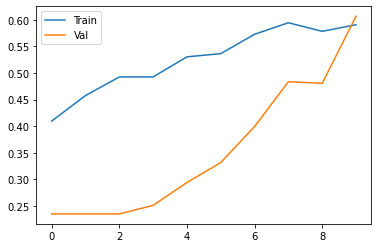

In [33]:
plt.plot(hist.history['accuracy'],label='Train')
plt.plot(hist.history['val_accuracy'],label='Val')
plt.legend()
plt.show()

In [34]:
test_generator = train_datagen.flow_from_directory('/kaggle/input/flowers-dataset/train',
                                 target_size=(159,143),
                                 batch_size=32,
                                 class_mode='binary'
                                 )

Found 2746 images belonging to 5 classes.


In [35]:
model_Best = model
model_Best.load_weights('/kaggle/working/Best-weights.hdf5')

In [36]:
model_Best.evaluate(train_generator)

86/86 [==============================] - 23s 265ms/step - loss: 1.6462 - accuracy: 0.5368


[1.6462156772613525, 0.5367807745933533]